In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [2]:
german = pd.read_csv("german_credit.csv")
german

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [3]:
german.shape

(1000, 21)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
z=german.sample(500) # Rather than using train test split i have used sample for selecting 50% data.
z.shape

(500, 21)

In [5]:
a = german.drop("default", axis=1)
b= german[['default']]
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.50,random_state=42)
a_train.shape

(500, 20)

In [6]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies      

In [7]:
R=pd.get_dummies(z)
R

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
73,0,42,5954,2,1,41,2,1,1,0,...,1,0,0,0,0,1,1,0,0,1
377,0,7,846,3,4,36,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
497,0,24,1585,4,3,40,2,1,0,0,...,1,0,0,1,0,0,1,0,0,1
851,0,24,4042,3,4,43,2,1,0,0,...,1,0,0,1,0,0,0,1,0,1
936,1,9,745,3,2,28,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
948,1,18,1533,4,1,43,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
674,1,21,2580,4,2,41,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
156,0,9,1288,3,4,48,2,2,0,1,...,1,0,0,1,0,0,1,0,1,0
58,0,18,1961,3,2,23,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
963,1,24,2397,3,2,35,2,1,0,0,...,1,0,0,1,0,0,0,1,0,1


In [8]:
R.shape

(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [9]:
R.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.249334,0.174051,0.084438,-0.011377,-0.064933,-0.054247,0.000708,0.130792,0.223496,...,-0.137034,0.116602,0.015368,-0.030995,-2.475503e-03,0.024929,0.024466,-0.024466,-1.140737e-01,1.140737e-01
duration_in_month,0.249334,1.000000,0.676776,0.015782,-0.019079,0.016287,-0.001992,-0.020466,0.061307,0.045433,...,-0.073984,-0.050106,0.143951,0.081491,-4.100499e-02,-0.193707,-0.161661,0.161661,-1.613520e-01,1.613520e-01
credit_amount,0.174051,0.676776,1.000000,-0.250106,0.010578,0.077402,0.042625,-0.010061,0.093673,0.019382,...,-0.156879,-0.013005,0.300122,-0.028955,-8.553572e-02,-0.172094,-0.276785,0.276785,-8.646297e-02,8.646297e-02
installment_as_income_perc,0.084438,0.015782,-0.250106,1.000000,0.070356,0.047278,0.002868,-0.034588,-0.080775,0.028285,...,0.075293,-0.078896,0.106026,0.019988,-9.623653e-02,-0.073399,-0.017327,0.017327,-1.741786e-01,1.741786e-01
present_res_since,-0.011377,-0.019079,0.010578,0.070356,1.000000,0.268138,0.106058,0.011623,-0.041730,0.113661,...,-0.326523,0.181773,0.066171,-0.072620,-6.468165e-03,0.035005,-0.141603,0.141603,-8.317944e-02,8.317944e-02
age,-0.064933,0.016287,0.077402,0.047278,0.268138,1.000000,0.174998,0.151113,-0.051291,-0.026485,...,-0.045088,-0.199634,0.166071,-0.198696,1.618175e-01,0.046025,-0.164606,0.164606,-1.496351e-02,1.496351e-02
credits_this_bank,-0.054247,-0.001992,0.042625,0.002868,0.106058,0.174998,1.000000,0.060942,-0.025892,-0.016366,...,0.023819,-0.036399,-0.014735,-0.026726,1.829193e-01,-0.019964,-0.069160,0.069160,-1.303409e-02,1.303409e-02
people_under_maintenance,0.000708,-0.020466,-0.010061,-0.034588,0.011623,0.151113,0.060942,1.000000,-0.049180,0.099472,...,0.004037,-0.074365,-0.016179,-0.077608,6.834700e-02,0.079711,0.052491,-0.052491,9.765892e-02,-9.765892e-02
account_check_status_0 <= ... < 200 DM,0.130792,0.061307,0.093673,-0.080775,-0.041730,-0.051291,-0.025892,-0.049180,1.000000,-0.388855,...,0.001905,-0.000142,0.083719,-0.065524,7.669894e-03,0.008144,-0.004187,0.004187,-5.753619e-02,5.753619e-02
account_check_status_< 0 DM,0.223496,0.045433,0.019382,0.028285,0.113661,-0.026485,-0.016366,0.099472,-0.388855,1.000000,...,-0.144307,0.120406,-0.020388,-0.014749,5.068813e-03,0.031425,0.055484,-0.055484,2.987601e-02,-2.987601e-02


In [10]:
#Highest correlated variable is default & duration in month, rest all variable doesnt have much impact.


### Drop the original variables which are converted to dummy

In [11]:
v=german.drop(['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'],axis = 1)

In [12]:
german

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
a = R.drop("default", axis=1)
b= R[['default']]
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.30,random_state=42)
a_test.shape

(150, 61)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
clf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
clf.fit(a, b) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
y_pred=clf.predict(a_test)

In [17]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
y_pred=clf.predict(a_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(b_test, y_pred)

1.0

In [20]:
z_pred=clf.predict(a_train)
accuracy_score(b_train, z_pred)

1.0

In [21]:
from sklearn import metrics
clf.score(a_train, b_train)

1.0

In [22]:
from sklearn import metrics
clf.score(a_test , b_test)

1.0

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(b_train, z_pred)
print(confusion_matrix1)

[[245   0]
 [  0 105]]


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(b_test, y_pred)
print(confusion_matrix1)

[[101   0]
 [  0  49]]


### Q6 Show the list of the features importance( 1 Marks)

In [25]:
print(clf.feature_importances_)


[0.08232004 0.09883623 0.03674949 0.0340537  0.08131604 0.01854225
 0.01110273 0.01762832 0.0253613  0.0097435  0.04063387 0.00750285
 0.01831774 0.00802918 0.01591886 0.01215166 0.00793054 0.00912295
 0.01926341 0.00774932 0.0169462  0.00497803 0.00075193 0.01232186
 0.00203668 0.00086508 0.0097474  0.01802899 0.00876477 0.00634107
 0.01608161 0.01496359 0.0115433  0.01622824 0.01296571 0.01024123
 0.01763672 0.00466955 0.00883615 0.01558097 0.00511356 0.0070675
 0.01090413 0.01434353 0.01506661 0.01805526 0.00993276 0.01417363
 0.0180181  0.00717175 0.00550798 0.01423804 0.01313318 0.01022589
 0.01472115 0.00167847 0.01202652 0.01400188 0.014758   0.00416087
 0.00389816]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
# Use below values
num_folds = 10
seed = 77

In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [32]:
u=v.values
X2 = u[:,1:8]
Y2 = u[:,0]
# feature extraction
scores = []
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=False)
for train_index, test_index in kfold.split(X2):
    X2_train, X2_test, y2_train, y2_test = X2[train_index], X2[test_index], Y2[train_index], Y2[test_index]
    scores.append(get_score(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2_train, X2_test, y2_train, y2_test))
scores

[0.78, 0.67, 0.68, 0.75, 0.74, 0.62, 0.71, 0.77, 0.67, 0.7]

In [33]:
#Validate the Random Forest model build above using k fold

In [34]:
print(np.mean(scores))

0.7090000000000001


In [35]:
#Calculate Mean score

In [36]:
print(np.std(scores))

0.04825971404805461


In [37]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

In [38]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_predict = cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2, Y2, cv=10)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(Y2, y_predict))

Confusion Matrix:
 [[628  72]
 [218  82]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [40]:
print("Accuracy:", accuracy_score(Y2, y_predict))

Accuracy: 0.71


In [41]:
from sklearn import metrics
print(metrics.classification_report(Y2,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       700
           1       0.53      0.27      0.36       300

   micro avg       0.71      0.71      0.71      1000
   macro avg       0.64      0.59      0.59      1000
weighted avg       0.68      0.71      0.68      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [42]:
#Hint: Use roc_curve
ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

SyntaxError: invalid syntax (<ipython-input-42-15a216b9cbb4>, line 2)

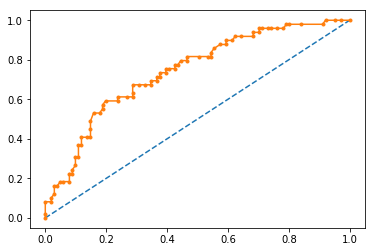

In [43]:
from sklearn.metrics import roc_curve
clf.fit(a_train, b_train)
probs = clf.predict_proba(a_test)
probs
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(b_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [50]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [51]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'X_train' is not defined

In [52]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  nan
Standard deviation:  nan
